TABLE :

In [1]:
from CreateTable import create_df
import matplotlib.pyplot as plt
import numpy as np
data = create_df()  # It is possible to round the positions without loosing any important information
data.head()

Source        posx        posy  \
0      1   99.999532   99.999410   
1     10   99.999379  101.999557   
2    100   95.999443   95.999442   
3   1000   83.999581  107.999765   
4   1001  107.999578   83.999643   

                                                posz  Stiffness        Tau  \
0  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...   0.026997  38.829463   
1  [82.994, 83.0, 82.999, 82.999, 82.999, 82.999,...   0.026958  32.094258   
2  [82.999, 82.999, 82.999, 82.999, 83.0, 82.999,...   0.027113  28.258263   
3  [82.999, 82.999, 83.0, 83.0, 82.999, 82.999, 8...   0.027435  28.341503   
4  [82.999, 82.999, 82.999, 82.999, 82.999, 82.99...   0.026910  27.415340   

   Force Steady State     Power     Entropy    Entropy_p   Upstroke  \
0            2.252376  0.107214 -716.976622 -3176.232791  14.583059   
1            2.240211  0.102176 -342.855724 -2964.853038  14.244284   
2            2.213623  0.109577 -296.861284 -2710.267613  14.304014   
3            2.240383  0.107476 -290.501396 -3308.463049  15.622295   
4            2.207106  0.108267 -252.743710 -4310.776371  11.124922   

   Downstroke  Slope diff  Slope ratio  Dominant Frequency  \
0  -15.844650   30.427709     0.920378            1.440660   
1  -15.028748   29.273032     0.947802            1.413023   
2  -14.383457   28.687471     0.994477            1.423610   
3  -14.117421   29.739716     1.106597            1.432499   
4  -14.013618   25.138539     0.793865            1.420790   

                                                  Fi  \
0  [0.003185664186621154, 0.0071734496252942904, ...   
1  [-0.03446689246228346, -0.024961148765345186, ...   
2  [-0.017143774549610635, -0.012535662300858872,...   
3  [-0.005233414813558469, 0.0064920173017498604,...   
4  [0.007278142888993408, 0.008285672340109742, 0...   

                                                  Pi  \
0  [0.08299873627528717, 0.08299890022909323, 0.0...   
1  [0.08299814230923235, 0.08299854134047153, 0.0...   
2  [0.08299871365894945, 0.08299885290484507, 0.0...   
3  [0.08299888545800851, 0.08299923795250107, 0.0...   
4  [0.08299849202517698, 0.08299870193765616, 0.0...   

                                               Timei  label  
0  [1.7845460000000912, 1.7875460000000911, 1.790...      3  
1  [1.490146999999979, 1.493146999999979, 1.49614...      3  
2  [1.4902060000001711, 1.493206000000171, 1.4962...      0  
3  [1.4920430000001943, 1.4950430000001942, 1.498...      0  
4  [1.4906260000007023, 1.4936260000007022, 1.496...      0

GRID PLOT

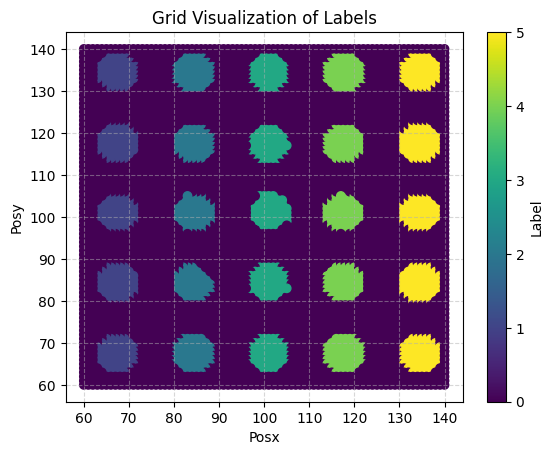

In [2]:
# Scatter plot with color based on the label
plt.scatter(data["posx"], data["posy"], c=data["label"], cmap="viridis")

# Grid and labels
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("Posx")
plt.ylabel("Posy")
plt.title("Grid Visualization of Labels")
plt.colorbar(label="Label")

plt.show()

PLOTTINI

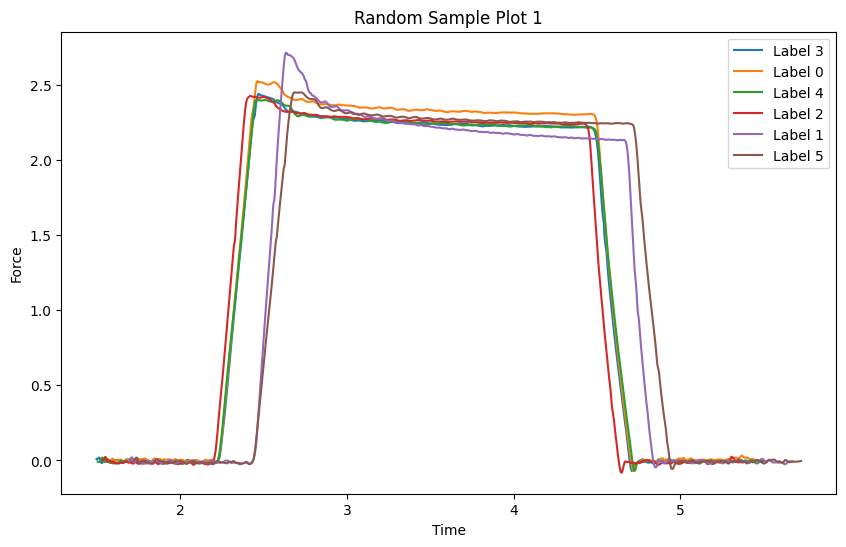

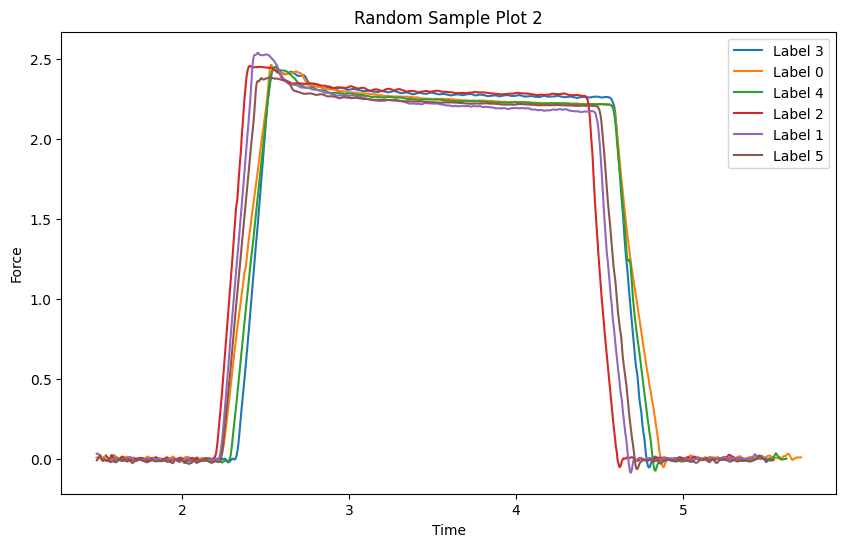

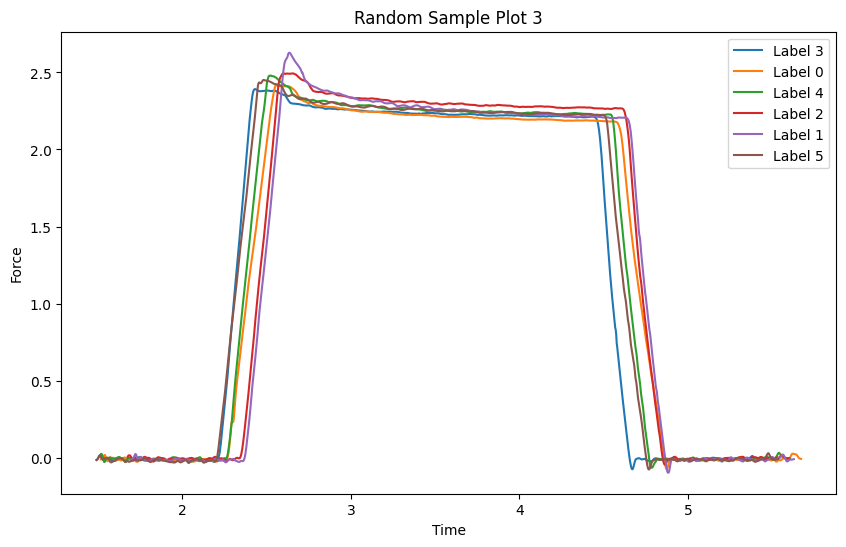

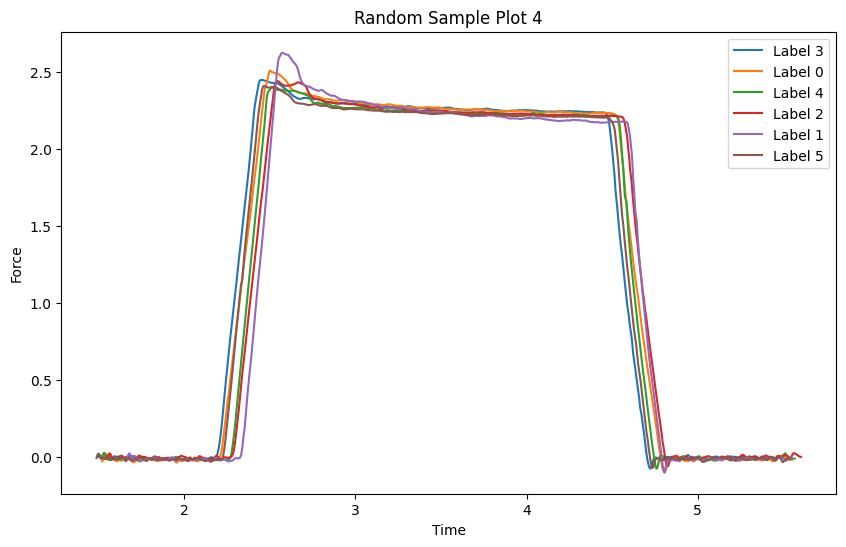

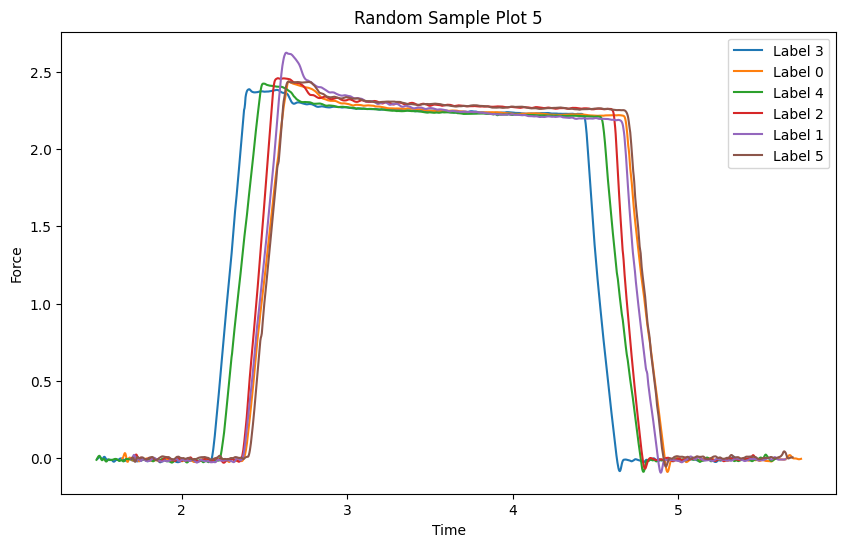

In [2]:
def plot_random_samples(df, label_column, force_column, pos_column, time_column, n=1):
    unique_labels = df[label_column].unique()  # Get unique labels

    for i in range(n):  # Repeat n times
        plt.figure(figsize=(10, 6))

        for label in unique_labels:
            # Randomly select one sample per label
            sample = df[df[label_column] == label].sample(1, random_state=np.random.randint(0, 10000))

            # Extract force, position, and time for the selected sample
            force = sample[force_column].tolist()[0]
            position = sample[pos_column].tolist()[0]
            time = sample[time_column].tolist()[0]

            # Plot force vs. time
            plt.plot(time, force, label=f'Label {label}')

        plt.xlabel('Time')
        plt.ylabel('Force')
        plt.title(f'Random Sample Plot {i+1}')
        plt.legend()
        plt.show()

# Example usage
# Assuming your DataFrame is called `df` and contains columns: 'label', 'forceZ', 'posZ', 'time'
plot_random_samples(data, label_column='label', force_column='Fi', pos_column='Pi', time_column='Timei', n=5)

PLOT OF A CYCLE

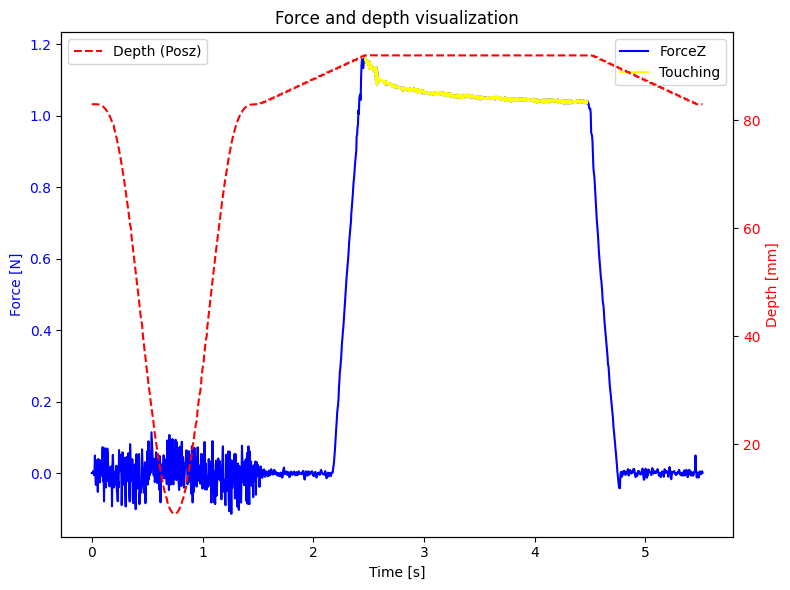

In [3]:
df = data.sample(1) # Picks a random row
posz_t = [pos for mask, pos in zip(df['Touching'].tolist()[0], df['posz'].tolist()[0]) if mask]
fz_t =  [f for mask, f in zip(df['Touching'].tolist()[0], df['Fz'].tolist()[0]) if mask]
t_touching = [f for mask, f in zip(df['Touching'].tolist()[0], df['t'].tolist()[0]) if mask]

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(df['t'].tolist()[0], df['Fz'].tolist()[0], label="ForceZ", color="blue", linestyle="-")
ax1.plot(t_touching, fz_t, color="yellow",label="Touching", linestyle="-")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Force [N]", color="blue")  # Replace with actual label
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(df['t'].tolist()[0], df['posz'].tolist()[0], label="Depth (Posz)", color="red", linestyle="--")
ax2.set_ylabel("Depth [mm]", color="red")  # Replace with actual label
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Force and depth visualization")
fig.tight_layout()
ax1.legend()
ax2.legend()
plt.show()

AFTER SMOOTHING (these are the signals that are used to extract the features)

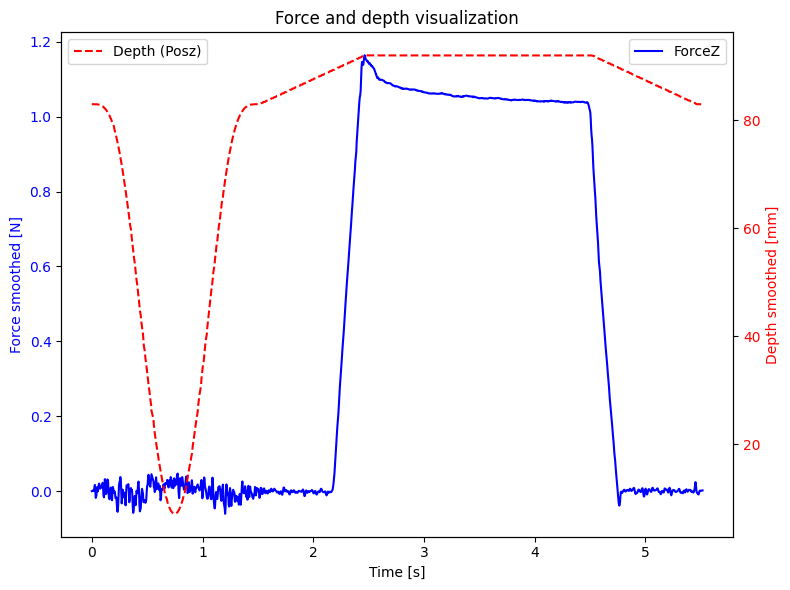

In [4]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(df['t'].tolist()[0], df['Fz_s'].tolist()[0], label="ForceZ", color="blue", linestyle="-")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Force smoothed [N]", color="blue")  # Replace with actual label
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(df['t'].tolist()[0], df['posz_s'].tolist()[0], label="Depth (Posz)", color="red", linestyle="--")
ax2.set_ylabel("Depth smoothed [mm]", color="red")  # Replace with actual label
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Force and depth visualization")
fig.tight_layout()
ax1.legend()
ax2.legend()
plt.show()

POWER SPECTRAL DENSITY

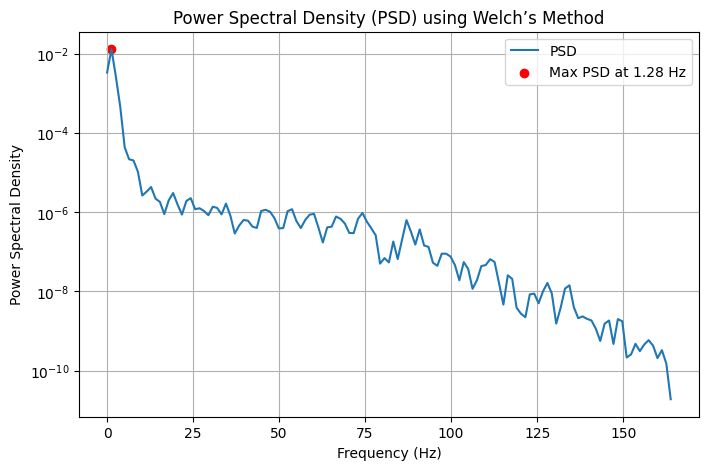

In [5]:
from scipy.signal import welch
df = data.sample(1) # Picks another random row
fs = 1/np.mean(np.diff(df['t'].tolist()[0]))
freqs, psd = welch(df['Fz_s'].tolist()[0], fs=fs)
psd_max_freq = freqs[np.argmax(psd)]  # Dominant frequency in the psd

# Plot PSD
plt.figure(figsize=(8, 5))
plt.semilogy(freqs, psd, label='PSD')
plt.scatter(psd_max_freq, np.max(psd), color='red', label=f'Max PSD at {psd_max_freq:.2f} Hz')

# Labels and title
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density (PSD) using Welch’s Method')
plt.legend()
plt.grid(True)
plt.show()

DISTRIBUTION OF FEATURES ACROSS DIFFERENT LABEL

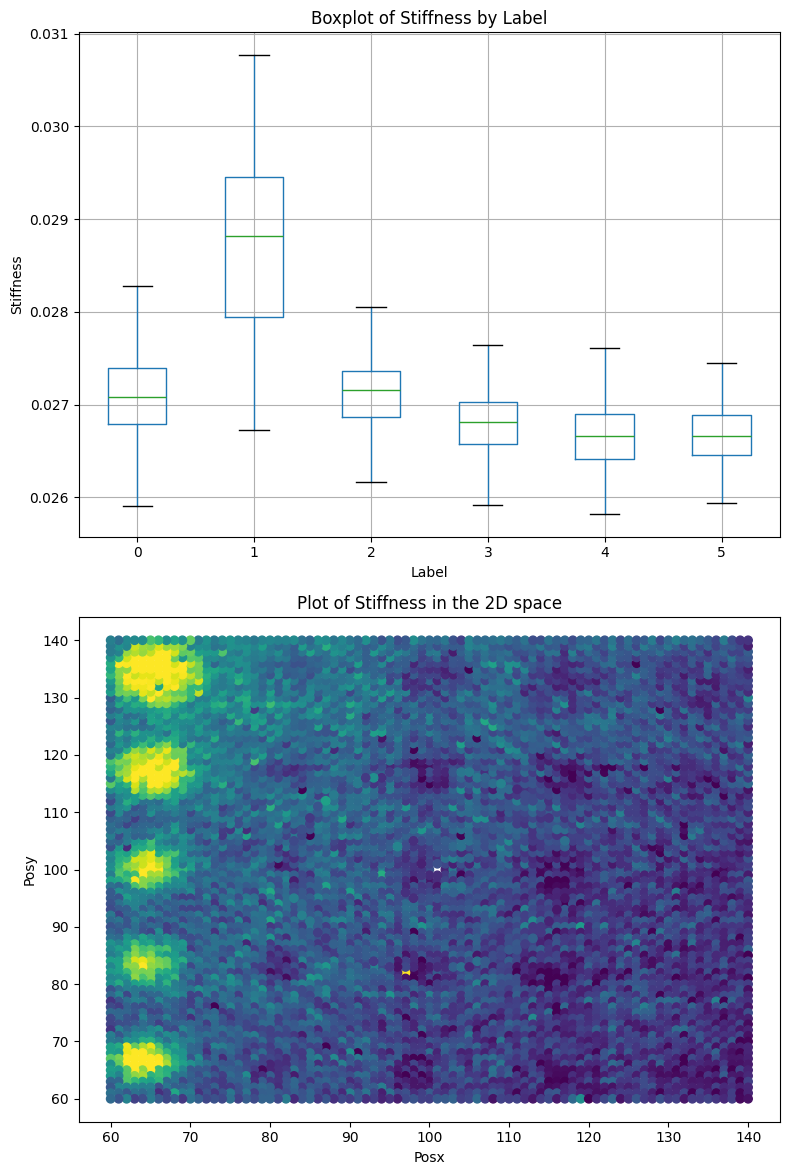

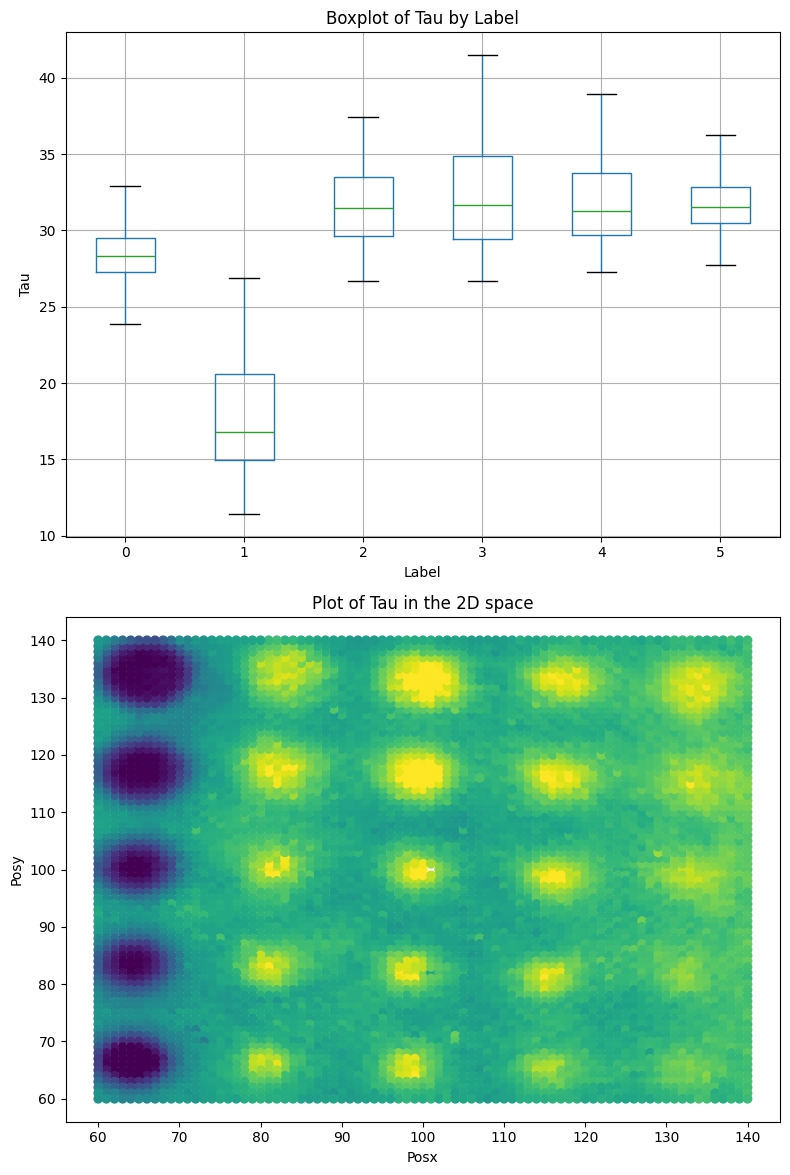

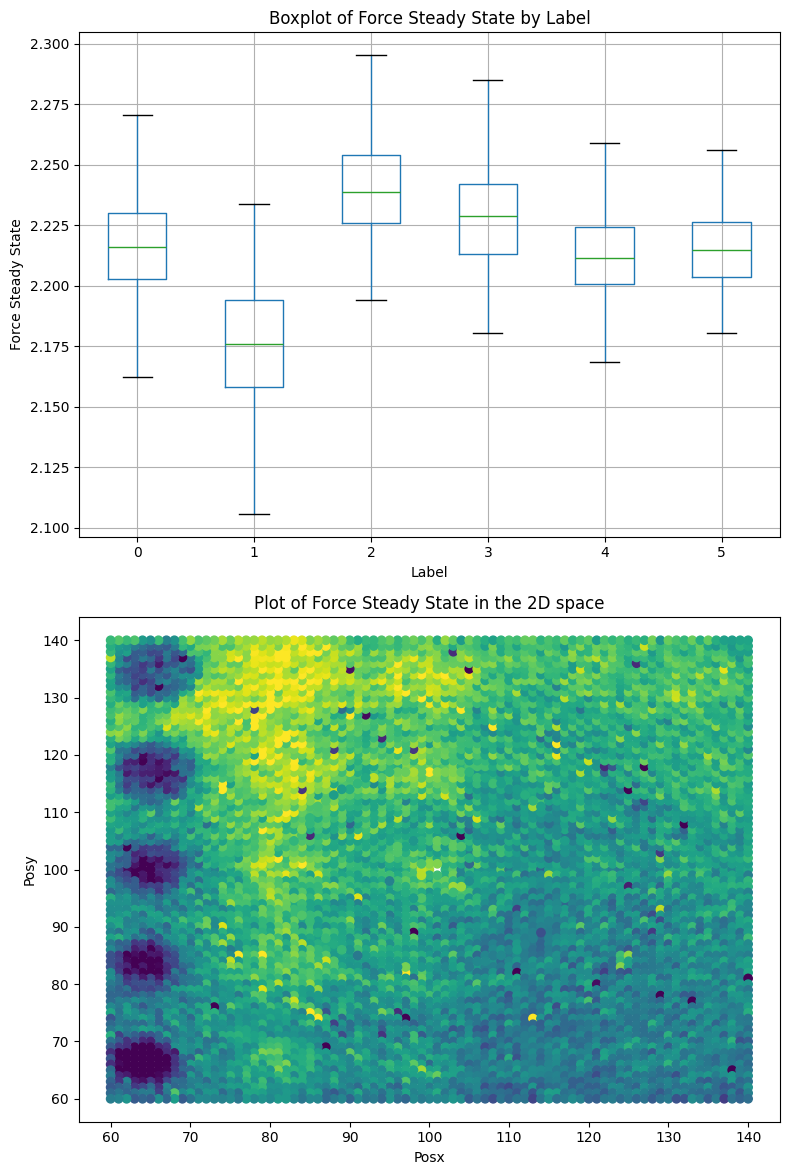

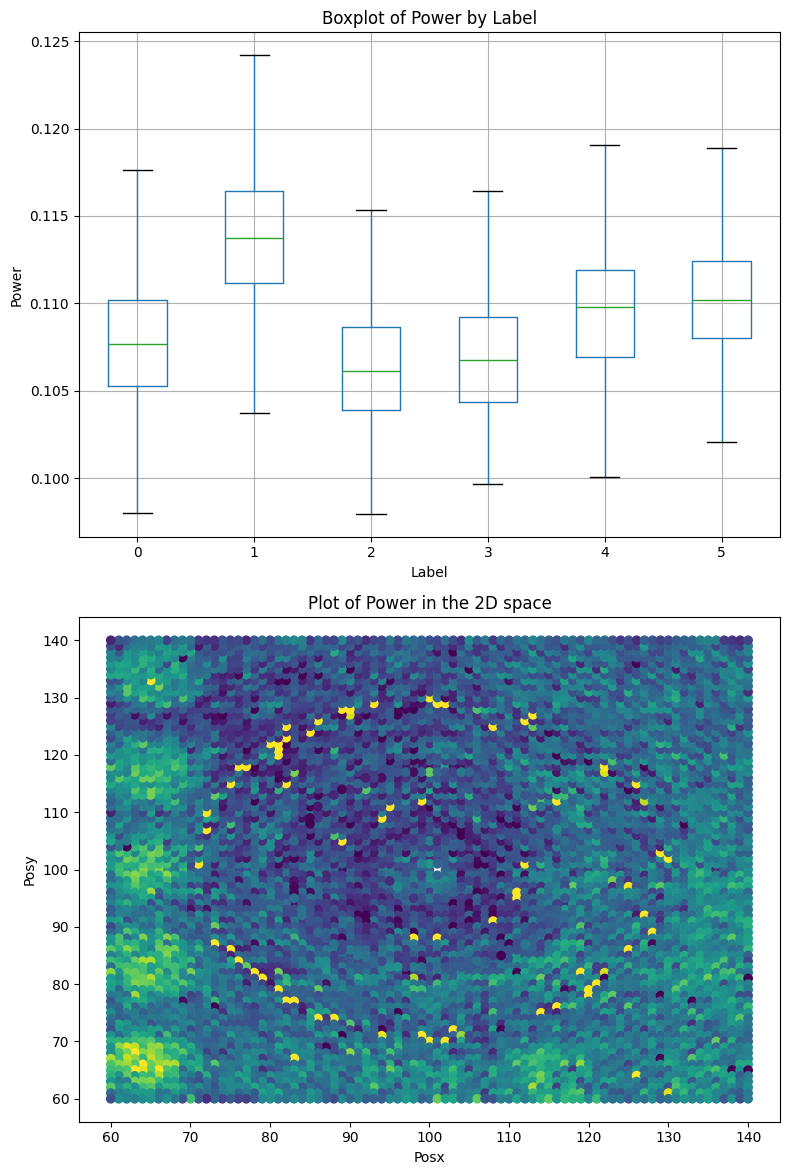

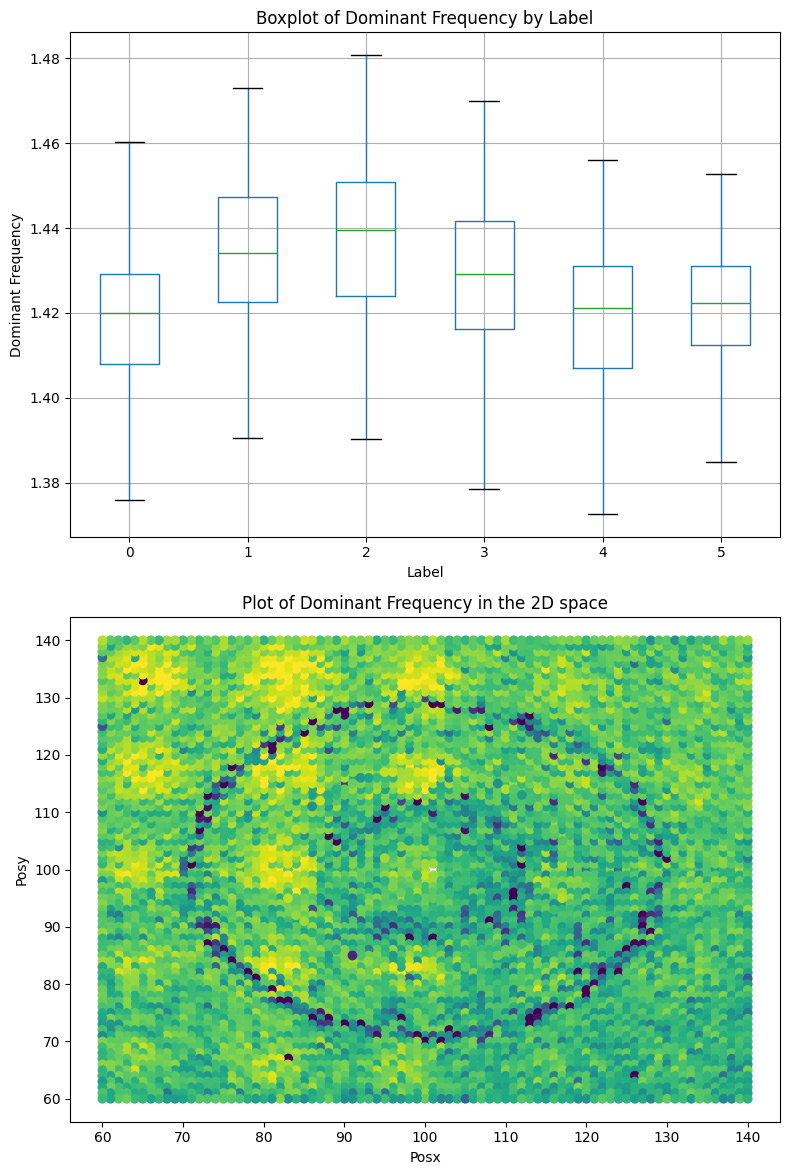

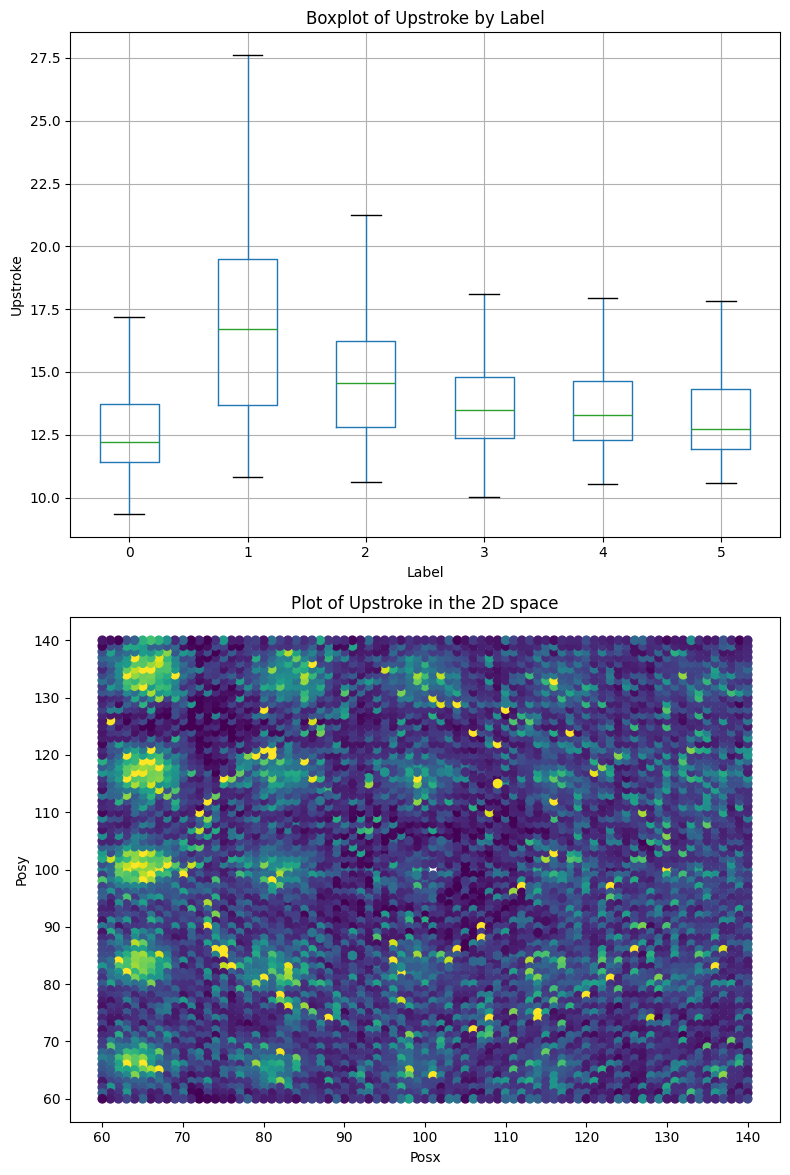

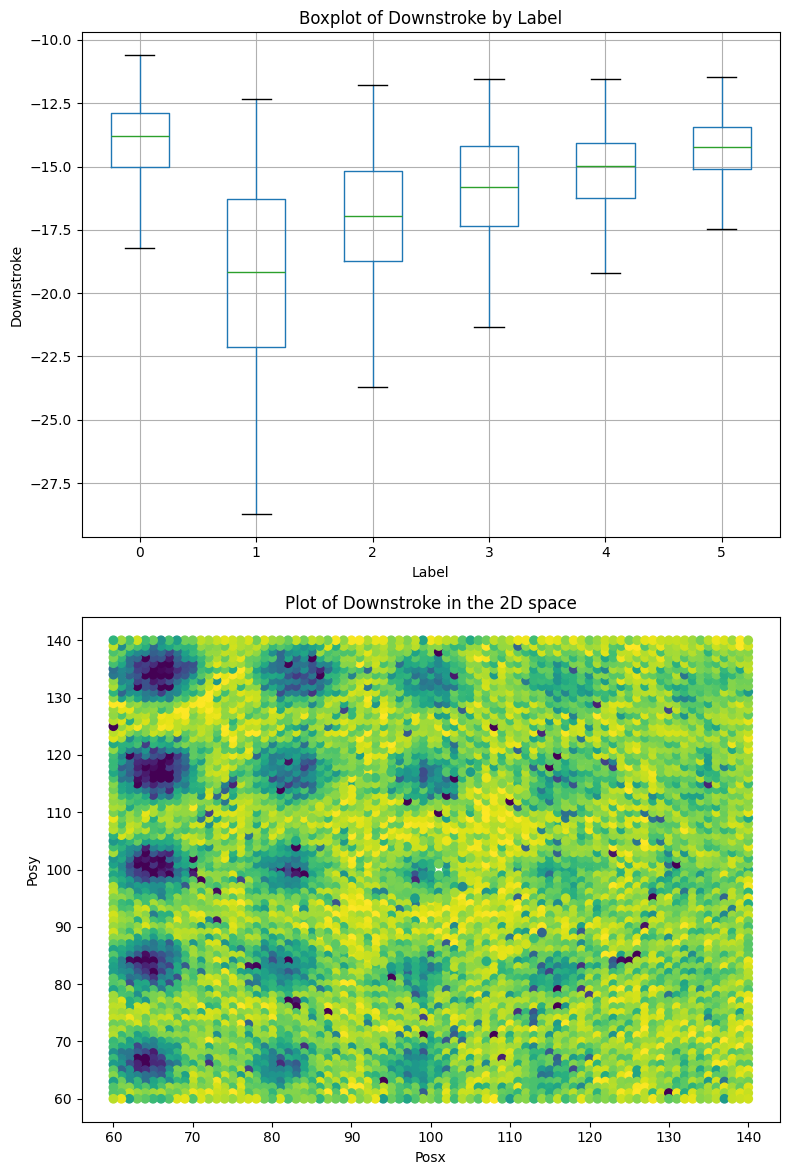

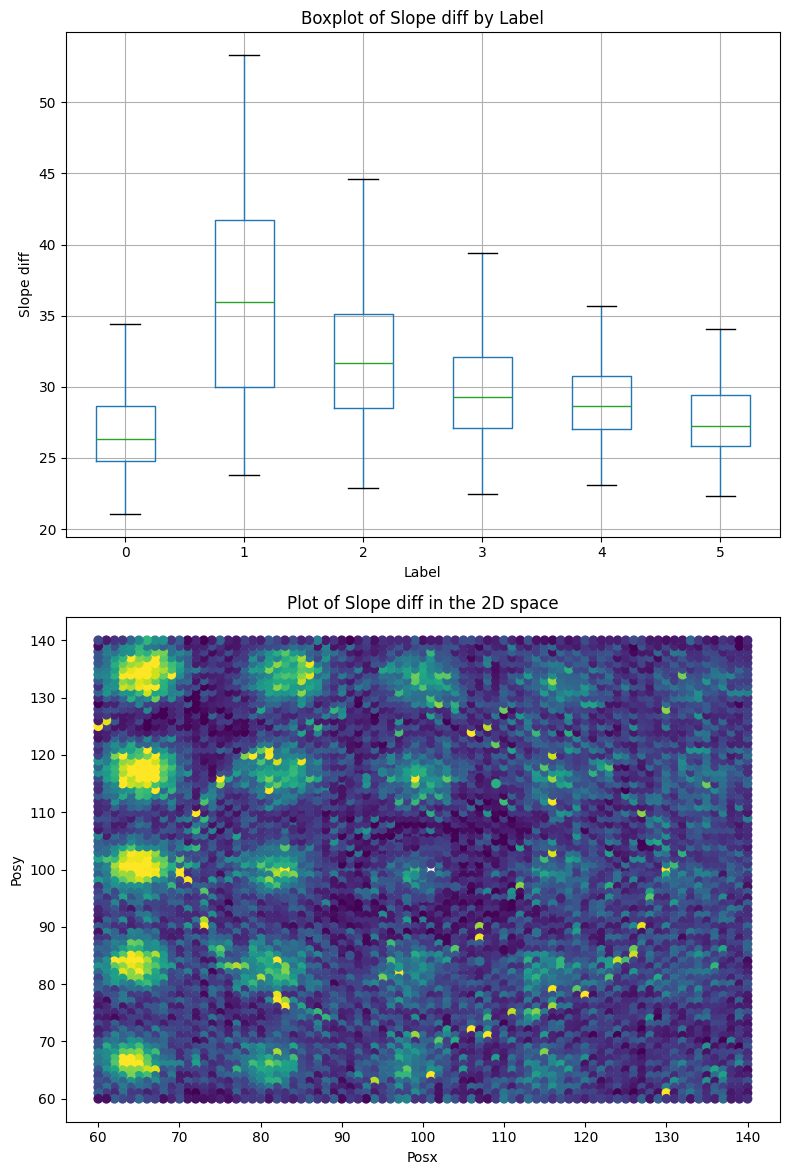

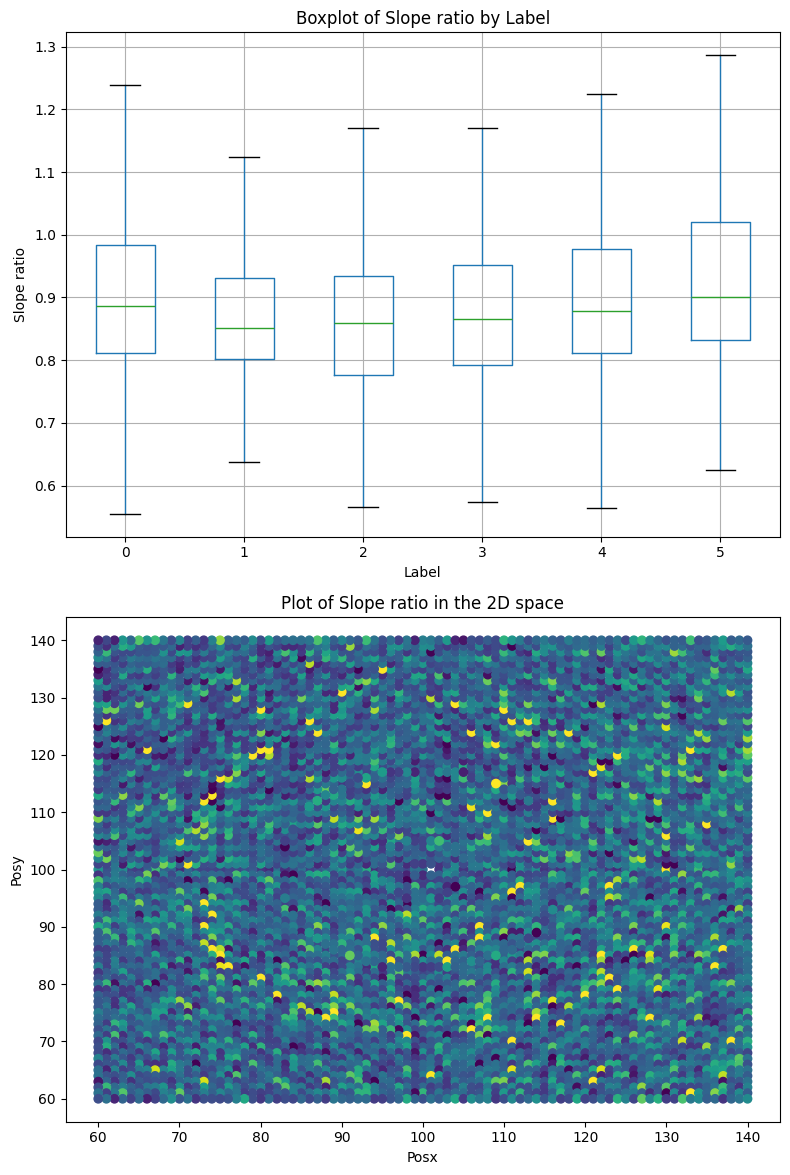

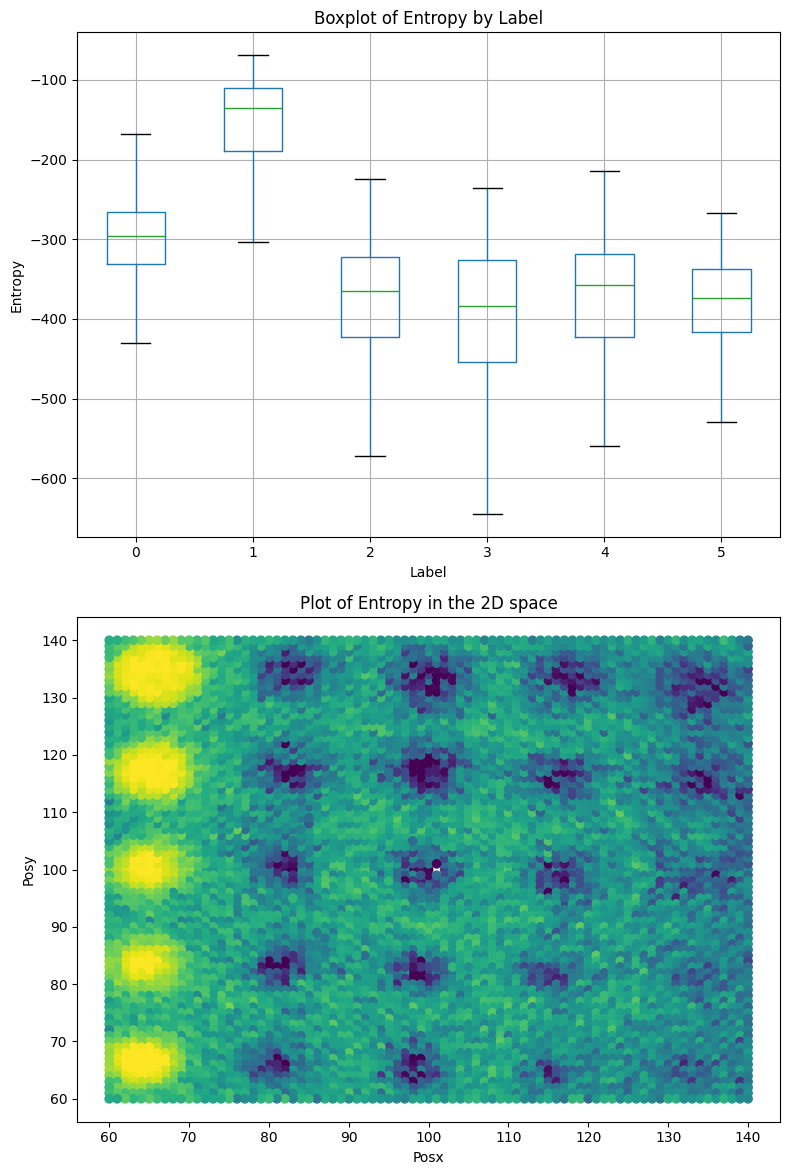

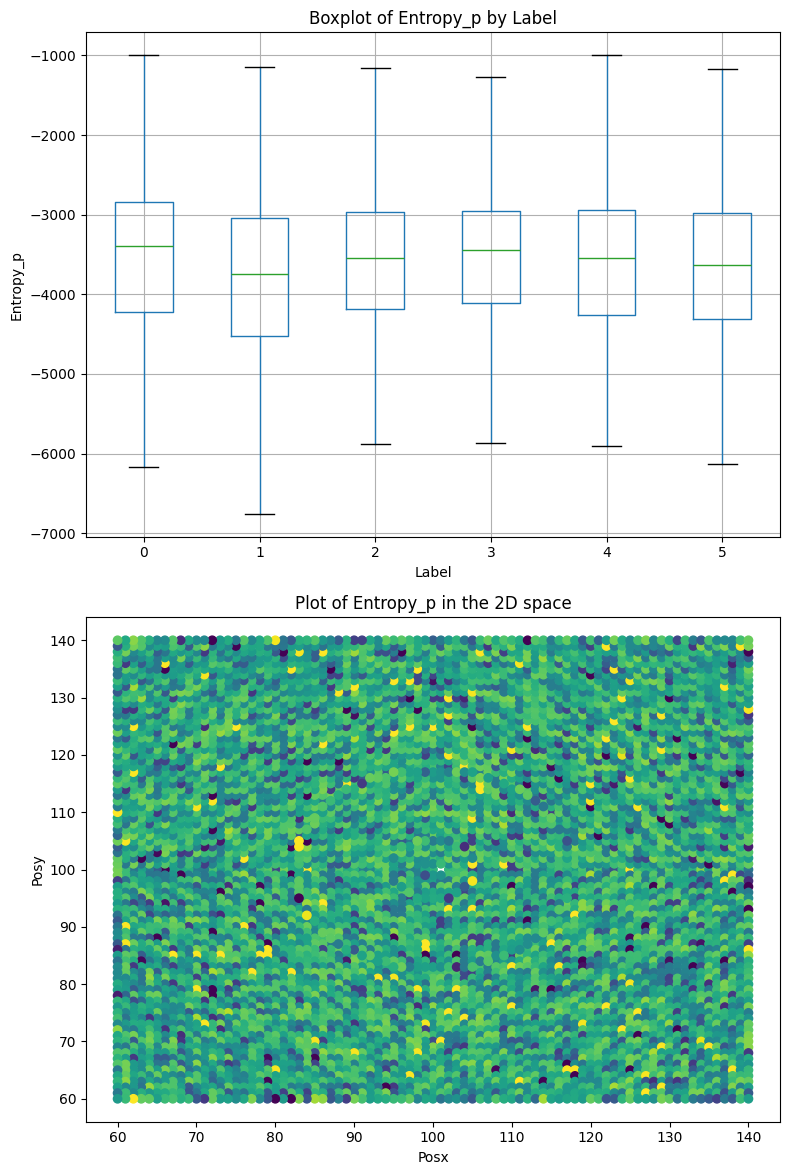

In [2]:
feature_list= ['Stiffness','Tau','Force Steady State','Power','Dominant Frequency','Upstroke','Downstroke','Slope diff','Slope ratio','Entropy','Entropy_p']  # Define the features name

for feature in feature_list:
    fig, axes = plt.subplots(2, 1, figsize=(8, 12))  # Create subplots (3 rows, 1 column)

    # Box plot (Feature distribution per Label)
    data.boxplot(column=feature, by="label", ax=axes[0], grid=True, showfliers=False)
    axes[0].set_title(f"Boxplot of {feature} by Label")
    axes[0].set_xlabel("Label")
    axes[0].set_ylabel(feature)

    # Scatter plot with color based on label
    vmin, vmax = np.percentile(data[feature], [1, 99])  # Set limits based on percentiles
    sc = axes[1].scatter(data["posx"], data["posy"], c=np.clip(data[feature], vmin, vmax), cmap="viridis", vmin=vmin, vmax=vmax)
    axes[1].set_xlabel("Posx")
    axes[1].set_ylabel("Posy")
    axes[1].set_title(f"Plot of {feature} in the 2D space")

    # Adjust layout and remove default Matplotlib boxplot title
    plt.suptitle("")  # Remove default title generated by `boxplot`
    plt.tight_layout()  # Prevent overlap
    plt.show()

Appendix: estimation of the sampling frequency + jitter

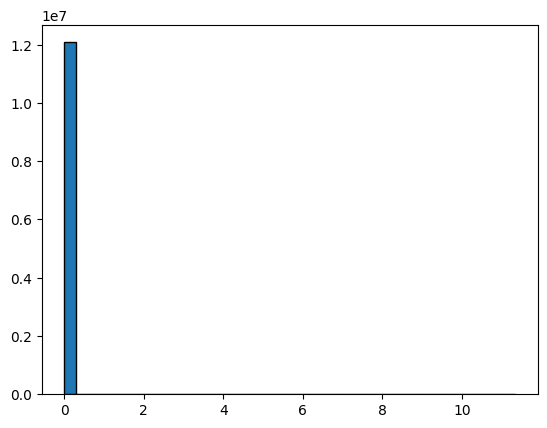

The sampling frequency is ~ 326.84985411852153 Hz
The jitter is ~ 0.0035192260965166773 Hz


In [7]:
delta_t = list()
for time in data['t'].tolist():
    delta_t.extend(np.diff(time))
plt.hist(delta_t, bins = 40, edgecolor='black')
plt.show()

f_mean = 1/np.mean(delta_t)
print(f'The sampling frequency is ~ {f_mean} Hz')

jitter = np.std(delta_t)
print(f'The jitter is ~ {jitter} Hz')

Test on Izhikevich neuron response

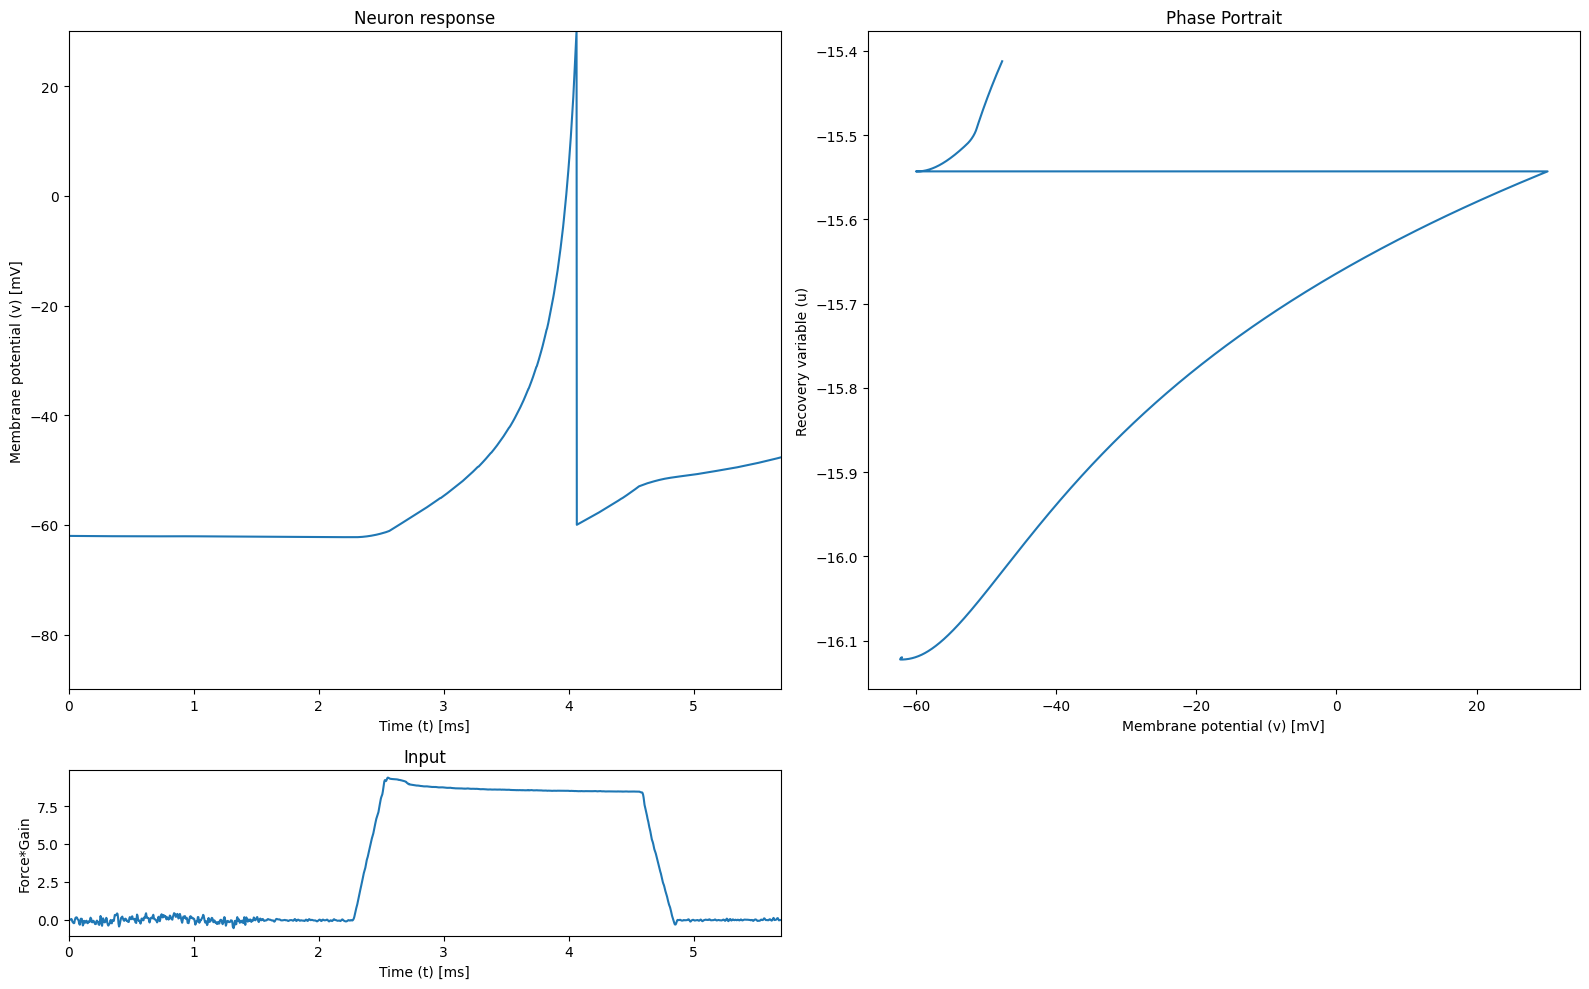

In [8]:
from Izhikevich import simulate_neuron #DEVO CAMBIARE LA SCALA TEMPORALE :)
gain = 8
input_f =np.multiply(df['Fz_s'].to_numpy()[0], gain)
time = df['t'].tolist()[0]
dt = np.mean(np.diff(time))
v,u = simulate_neuron(0.05,0.26,-60,0,-62,0.26*-62,dt,time,input_f)

fig = plt.figure(figsize=(16, 10))

# Time vs. Membrane Potential Plot
ax1 = plt.subplot2grid((4, 4), (0, 0), colspan=2, rowspan=3)
ax1.plot(time, v)
ax1.set_title('Neuron response')
ax1.set_xlim(0, max(time))
ax1.set_ylim(-90, 30)  # See note below
ax1.set_xlabel("Time (t) [ms]")
ax1.set_ylabel("Membrane potential (v) [mV]")

# Phase Portrait Plot
ax2 = plt.subplot2grid((4, 4), (0, 2), colspan=2, rowspan=3)
ax2.plot(v, u)
ax2.set_title('Phase Portrait')
ax2.set_xlabel("Membrane potential (v) [mV]")
ax2.set_ylabel("Recovery variable (u)")

# Input Current Plot
ax3 = plt.subplot2grid((4, 4), (3, 0), colspan=2, rowspan=1)
ax3.plot(time, input_f)
ax3.set_xlim(0, max(time))
ax3.set_title("Input")
ax3.set_xlabel("Time (t) [ms]")
ax3.set_ylabel("Force*Gain")

# Adjust layout and plot
plt.tight_layout()
plt.show()
